## ***Nama Kelompok***

In [ ]:
print("Aulia Insani. H - H071201003")
print("Ayu Lestari Ramadhani - H071201007")
print("Selviyani Jusbar - H071201008")
print("Nabilah Luthfiyyah - H071201038")

Aulia Insani. H - H071201003
Ayu Lestari Ramadhani - H071201007
Selviyani Jusbar - H071201008
Nabilah Luthfiyyah - H071201038


## ***DATASET FORESTFIRES***

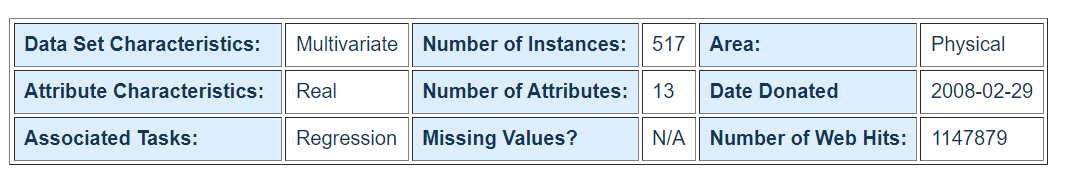

**Informasi Atribut**

1. X - koordinat spasial sumbu x dalam peta taman Montesinho : 1 sampai 9
2. Y - koordinat spasial sumbu y dalam peta taman Montesinho : 2 sampai 9
3. month - bulan dalam setahun : januari sampai desember
4. day - hari dalam sepekan : senin sampai minggu
5. FFMC - indeks FFMC (Fine Fuel Moisture Code) dari sistem FWI (Fire Weather Index) : 18,7 hingga 96,20
6. DMC - indeks DMC (Duff Moisture Code) dari sistem FWI : 1,1 hingga 291,3
7. DC - indeks DC (Drought Code) dari sistem FWI : 7,9 hingga 860,6
8. ISI - indeks ISI (Initial Spread Index) dari sistem FWI : 0,0 hingga 56,10
9. Temp - suhu (dalam derajat celcius) : 2,2 hingga 33,30
10. RH - kelembaban relatif (dalam %) : 15,0 hingga 100
11. Wind - kecepatan angin (dalam km/jam) : 0,40 hingga 9,40
12. Rain - hujan luar (dalam mm/m2) : 0,0 hingga 6,4
13. Area - areal hutan yang terbakar (dalam ha) : 0,00 hingga 1090,84

Tujuannya adalah untuk memprediksi areal kebakaran hutan yang terbakar di wilayah timur laut Portugal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as met
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## **Data Understanding and Preparation**

1. Memuat data ke dalam sebuah dataframe atau load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tugas Kelompok ML/forestfires.csv")


2. Menampilkan 5 baris pertama dataset

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


3. Encoding Categorical Data

In [ ]:
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])


4. Menampilkan 5 baris pertama dataset setelah dilakukan encoding data

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


5. Menampilakan deskripsi statistik data

In [ ]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


6. Menampilkan jumlah kolom dan baris dari dataset

In [ ]:
df.shape

(517, 13)

7. Menampilkan tipe dari setiap data di dataset

In [ ]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

8. Melihat missing values

In [ ]:
df.isna().sum().sum()

0

9. Melihat correlation dari setiap data

In [ ]:
df.corr(method='pearson')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.017303,-0.009129,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.062162,0.030100,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.017303,-0.062162,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054
day,-0.009129,0.030100,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916
FFMC,-0.021039,-0.046308,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


10. Menampilkan visualisasi dari correlation dalam heatmap correlation

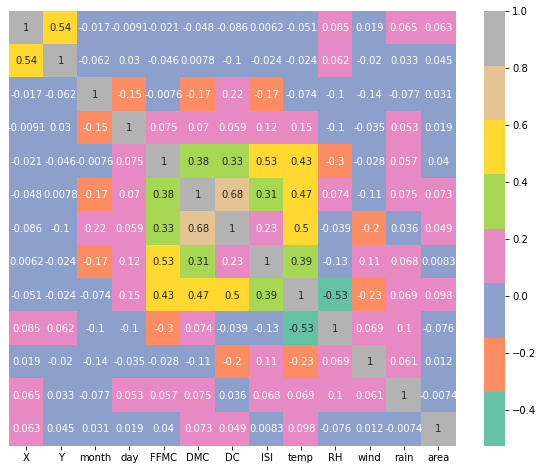

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),yticklabels=False,cmap="Set2",annot=True)

'temp' memiliki korelasi tertinggi dengan area hutan yang terbakar (korelasi positif), diikuti dengan 'RH' dan korelasi terakhir adalah 'Rain'

11. Membagi data menjadi X dan Y

In [ ]:
X=df.drop('area', axis=1)
y=df['area']


# **MODEL**

# ***Linear Regression***

1. Membuat model linear regression

In [ ]:
model1 = LinearRegression()
model1.fit(X, y)


LinearRegression()

2. Mengetahui nilai koefisien dan intercept

In [ ]:
print (model1.coef_)
print (model1.intercept_)

[ 1.88124305  0.52679701  0.97328461  0.49952683 -0.10739595  0.10979519
 -0.01462744 -0.6108142   0.98013486 -0.18491854  1.78229487 -3.25170999]
-11.500571898709369


3. Menampilkan nilai koefisien dan intercept dalam tabel

In [ ]:
coef_dict = {
    "features" : X.columns,
    "coef_value" : model1.coef_
}
coef = pd.DataFrame(coef_dict, columns= ["features", "coef_value"])
coef

,features,coef_value
0,X,1.881243
1,Y,0.526797
2,month,0.973285
3,day,0.499527
4,FFMC,-0.107396
5,DMC,0.109795
6,DC,-0.014627
7,ISI,-0.610814
8,temp,0.980135
9,RH,-0.184919


4. Membuat prediksi

In [ ]:
predictions = model1.predict(X)

5. Menampilkan nilai prediksi

In [ ]:
predictions

array([ 1.07873258e+01,  9.42698073e+00,  5.95979132e+00, -2.62297781e+00,
       -2.20245629e-01,  1.85384926e+01,  1.97433962e+01, -5.25253014e+00,
        2.07669922e+01,  2.32591531e+01,  2.20277184e+01,  8.86307538e+00,
        9.41725947e+00,  2.04672348e+01,  3.49425289e+01,  2.36102595e+01,
        1.59195137e+01,  1.57614345e+01,  1.65452174e+01,  1.09693433e+00,
        2.04885436e+01,  1.02701857e+01, -5.16597678e+00,  1.80874365e+01,
        1.75695444e+01,  1.12999334e+01,  2.29524949e+01,  1.72458480e+01,
        3.34802950e+01,  2.58692552e+01,  1.83246608e+01,  8.51535771e+00,
        1.28863782e+01,  1.33058815e+01,  1.47924262e+01,  1.35984062e+01,
        1.87259680e+01,  2.70505881e+00,  1.44911333e+01,  8.17305948e+00,
        1.88514231e+01,  8.69855023e+00, -6.28037411e-01,  1.01558637e+01,
        4.40508375e+00,  2.22239552e+01,  9.96139241e+00,  1.32508596e+01,
        3.55412525e+00,  9.80767276e+00,  1.95085431e+01,  6.95089134e+00,
        9.42308800e+00,  

Menampilkan nilai score dari model

In [ ]:
print("r2_score:",met.r2_score(y, predictions))
print("MAE:",mean_absolute_error(y, predictions))
print("MSE:",mean_squared_error(y, predictions))

r2_score: 0.024723817464122777
MAE: 19.551706819989374
MSE: 3944.2368833708115


# ***Decision Tree***

1. Membuat model decision tree

In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(X, y)

DecisionTreeRegressor()

2. Membuat prediksi

In [ ]:
pred = model2.predict(X)

3. Menampilkan nilai prediksi

In [ ]:
pred

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 8.45000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

4. Menampilkan nilai score dari model

In [ ]:
print("r2 Score:", met.r2_score(y,pred))
print("MAE:",mean_absolute_error(y,pred))
print("MSE:",mean_squared_error(y,pred))

r2 Score: 0.9998970573716115
MAE: 0.09644100580270795
MSE: 0.41632321083172147


# **Perbandingan Model**

Setelah melakukan pembuatan model dan perhitungan maka,

Model algoritma Linear Regression menghasilkan nilai akurasi Sebesar :

*   r2 Score : 0.024723817464122777
*   MAE : 19.551706819989374
*   MSE : 3944.2368833708115

Sedangkan nilai akurasi dari model algoritma Decision Tree  menghasilkan nilai akurasi sebesar :


*   r2 Score : 0.9998970573716115
*   MAE : 0.09644100180270795
*   MSE : 0.41632321083172147

Jadi, model yang bagus untuk dataset ini adalah menggunakan model algoritma decision tree.
